# Assignment 7
- by Martim Silva 51304 and Alexandre Sobreira 59451

In [46]:
import os
import datetime
import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from sklearn import metrics
from sklearn.metrics import mean_squared_error

In [55]:
def lstm_func(nrEpochs, lag, X, y):

    ## LSTM Model
    lstm_model = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer((lag,1)),    # The input layer will be lag
    tf.keras.layers.LSTM(10),  # Since we have an imput of 12 it doesnt make sence to use higher than that # trocar par DENSE
    tf.keras.layers.Dense(1, activation="tanh"), # Since I want to predict 1 value I want to output 1!
    ])
    
    ## Compile
    lstm_model.compile(optimizer = "Adam", loss = "mse")

    ##Adapt X
    X_lstm = np.expand_dims(X, axis = 2)

    ## 1st split
    print("1st split")
    X_lstm_train1 = X_lstm[:2400]
    y_lstm_train1 = y[:2400]
    ### fit 
    history_lstm1 = lstm_model.fit(X_lstm_train1, y_lstm_train1, batch_size=1, epochs=nrEpochs, shuffle=False, verbose=True)
    
    ### pred
    X_lstm_test1 = X_lstm[2401:2501]
    y_lstm_test1 = y[2401:2501]
    y_pred1 = lstm_model.predict(X_lstm_test1)
    mse1 = mean_squared_error(y_lstm_test1, y_pred1)
    
    ####### 2nd split and fit #######
    print("2nd split")
    X_lstm_train2=X_lstm[2401:4900]
    y_lstm_train2=y[2401:4900]
    ### fit 
    history_lstm2 = lstm_model.fit(X_lstm_train2, y_lstm_train2, batch_size=1, epochs=nrEpochs, shuffle=False, verbose=True)

    ###pred
    X_lstm_test2 = X_lstm[4901:]
    y_lstm_test2 = y[4901:]
    y_pred2 = lstm_model.predict(X_lstm_test2)
    mse2 = mean_squared_error(y_lstm_test2, y_pred2)
    
    
    print("The mse for the 1st split is: " + str(mse1) + " vs " + str(mse2) + " for the 2nd split")
    

    ## PLots for learning curves (loss)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
    
    ax1.plot(history_lstm1.history['loss'], label="loss")
    ax1.set_title("Loss Plot 1st split")
   
    ax2.plot(history_lstm2.history['loss'], label="loss")
    ax2.set_title("Loss Plot 2nd split")
    
    plt.show()

    
    ## Plots for predictions and expected results 2
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(35,10))

    ax1.set_title("Train, Test and Predicted Results")
    ax1.plot(y_lstm_train1,  label="Train")
    ax1.plot([None for i in y_lstm_train1] + [x for x in y_lstm_test1], label="Test", lw = 2)
    ax1.plot([None for i in y_lstm_train1] + [x for x in y_pred1], label="Predicted", linestyle = ":", lw = 3)
    ax1.legend(loc="upper left", prop= {"size": 15}) 
    ax1.tick_params(labelsize=15)

    ax2.set_title("Train, Test and Predicted Results")
    ax2.plot(y_lstm_train2,  label="Train")
    ax2.plot([None for i in y_lstm_train2] + [x for x in y_lstm_test2], label="Test", lw = 2)
    ax2.plot([None for i in y_lstm_train2] + [x for x in y_pred2], label="Predicted", linestyle = ":", lw = 3)
    ax2.legend(loc="upper left", prop= {"size": 15}) 
    ax2.tick_params(labelsize=15)

    plt.show()

In [48]:
def ftlfn_func(nrEpochs, lag, X, y): 
    
    ## FTLFN Model
    ftlf_model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_dim=X.shape[1]),    
    tf.keras.layers.Dense(1),  
    ])
    
    ## Compile
    ftlf_model.compile(optimizer = "Adam", loss = "mse")

    ##Adapt X
    X = np.expand_dims(X, axis = 2)
    y = np.array(y)

    ## 1st split
    print("1st split")
    X_ftlfn_train1 = X[:2400]
    y_ftlfn_train1 = y[:2400]
    ### fit 
    history_ftlfn1 = ftlf_model.fit(X_ftlfn_train1, y_ftlfn_train1, batch_size=1, epochs=nrEpochs, shuffle=False, verbose=True)
    
    ### pred
    X_ftlfn_test1 = X[2401:2501]
    y_ftlfn_test1 = y[2401:2501]
    y_pred1 = ftlf_model.predict(X_ftlfn_test1)
    mse1 = mean_squared_error(y_ftlfn_test1, y_pred1)
    
    ####### 2nd split and fit #######
    print("2nd split")
    X_ftlfn_train2=X[2401:4900]
    y_ftlfn_train2=y[2401:4900]
    ### fit 
    history_ftlfn2 = ftlf_model.fit(X_ftlfn_train2, y_ftlfn_train2, batch_size=1, epochs=nrEpochs, shuffle=False, verbose=True)

    ###pred
    X_ftlfn_test2 = X[4901:]
    y_ftlfn_test2 = y[4901:]
    y_pred2 = ftlf_model.predict(X_ftlfn_test2)

    mse2 = mean_squared_error(y_ftlfn_test2, y_pred2)
    print("The mse for the 1st split is: " + str(mse1) + " vs " + str(mse2) + " for the 2nd split")
    
    ## PLots for learning curves (loss)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
    
    ax1.plot(history_ftlfn1.history['loss'], label="loss")
    ax1.set_title("Loss Plot 1st split")
   
    ax2.plot(history_ftlfn2.history['loss'], label="loss")
    ax2.set_title("Loss Plot 2nd split")
    
    plt.show()

    
    ## Plots for predictions and expected results 2
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(35,10))

    ax1.set_title("Train, Test and Predicted Results")
    ax1.plot(y_ftlfn_train1,  label="Train")
    ax1.plot([None for i in y_ftlfn_train1] + [x for x in y_ftlfn_test1], label="Test", lw = 2)
    ax1.plot([None for i in y_ftlfn_train1] + [x for x in y_pred1], label="Predicted", linestyle = ":", lw = 3)
    ax1.legend(loc="upper left", prop= {"size": 15}) 
    ax1.tick_params(labelsize=15)

    ax2.set_title("Train, Test and Predicted Results")
    ax2.plot(y_ftlfn_train2,  label="Train")
    ax2.plot([None for i in y_ftlfn_train2] + [x for x in y_ftlfn_test2], label="Test", lw = 2)
    ax2.plot([None for i in y_ftlfn_train2] + [x for x in y_pred2], label="Predicted", linestyle = ":", lw = 3)
    ax2.legend(loc="upper left", prop= {"size": 15}) 
    ax2.tick_params(labelsize=15)

    plt.show()


# Problem 1

In [49]:
# I need to use the sin function
# First I need to generate the x
periods = 100
lag = 12
points_per_period = 50
data = np.sin(np.linspace(0,2*np.pi*periods, num=periods*points_per_period)) #This is my x, it will be my angles, 0 to pi.
data                                                                         #it will creat equaly size spaces between 0 and .. (linspace)
                                                                            #and I apply the sin...
                                                                            # 
                                                                            # # lets add the lag

array([ 0.00000000e+00,  1.25358173e-01,  2.48738583e-01, ...,
       -2.48738583e-01, -1.25358173e-01,  3.92877345e-15])

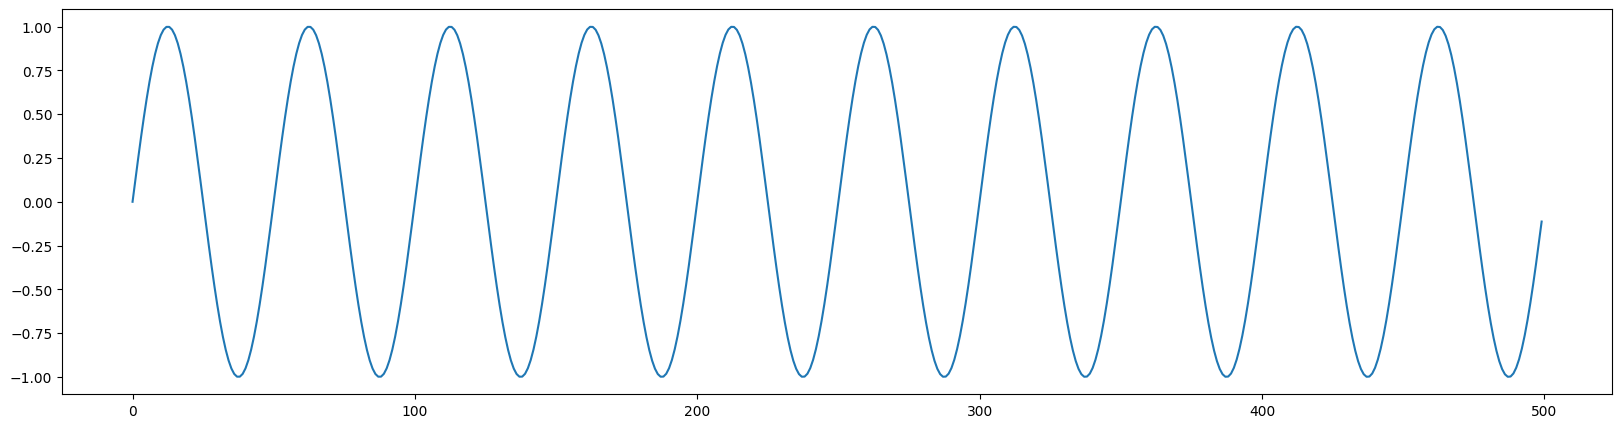

In [50]:
fig = plt.figure(figsize=(20,5))
plt.plot(data[0:500])
plt.show()

In [51]:
## Adapt Data for Time series 
X, y = [], []
for i in range(lag, data.shape[0]-1):
    X.append(data[i-lag:i]) # we getting 12 sample. My x will have 4000 samples each with 12 instances
    y.append(data[i])


X = np.array(X)
y = np.array(y)

 The sin function gave me the complete signal. But we need to adapt for this problem\
 To make predictions we need to to have several windows.\
 We consturct a data set  which has 12 datapoints and the label. Fazemos um shift de 12 em 12.\
 it says we need to use a filter of 12 (we are going to observe the 12 and predict the next 1). Then we shift again and so one

## i) no noise

In [52]:
epochs = 10 

FOr this type of problem, since we are comparing values, the MSE is the best lost function, for images would be the cross entropy

THe fit shuffles by default and we dont want that, we want to preserva the order. 

network needs to "warm up" to find the direction of the gradient. This will have  a huge impact on the MSE this  to pass the 

### LSTM

1st split
4/4 [==============================] - 0s 1ms/step
2nd split
3/3 [==============================] - 0s 1ms/step
The mse for the 1st split is: 0.0006964408436323155 vs 4.9815699744774904e-05 for the 2nd split


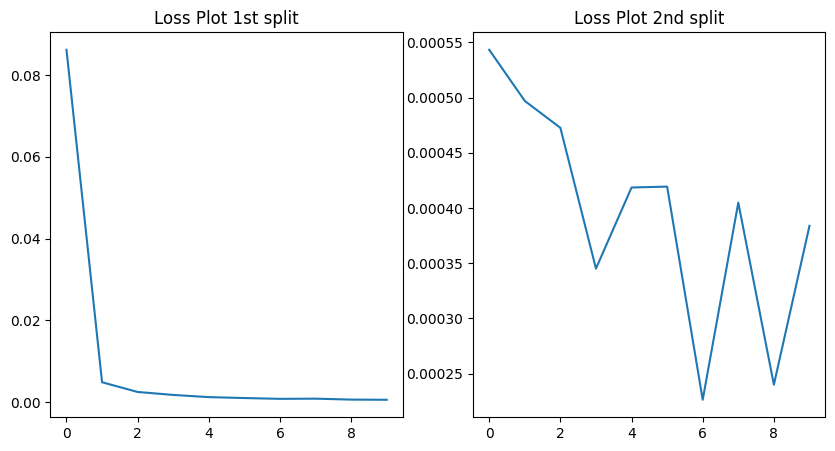

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


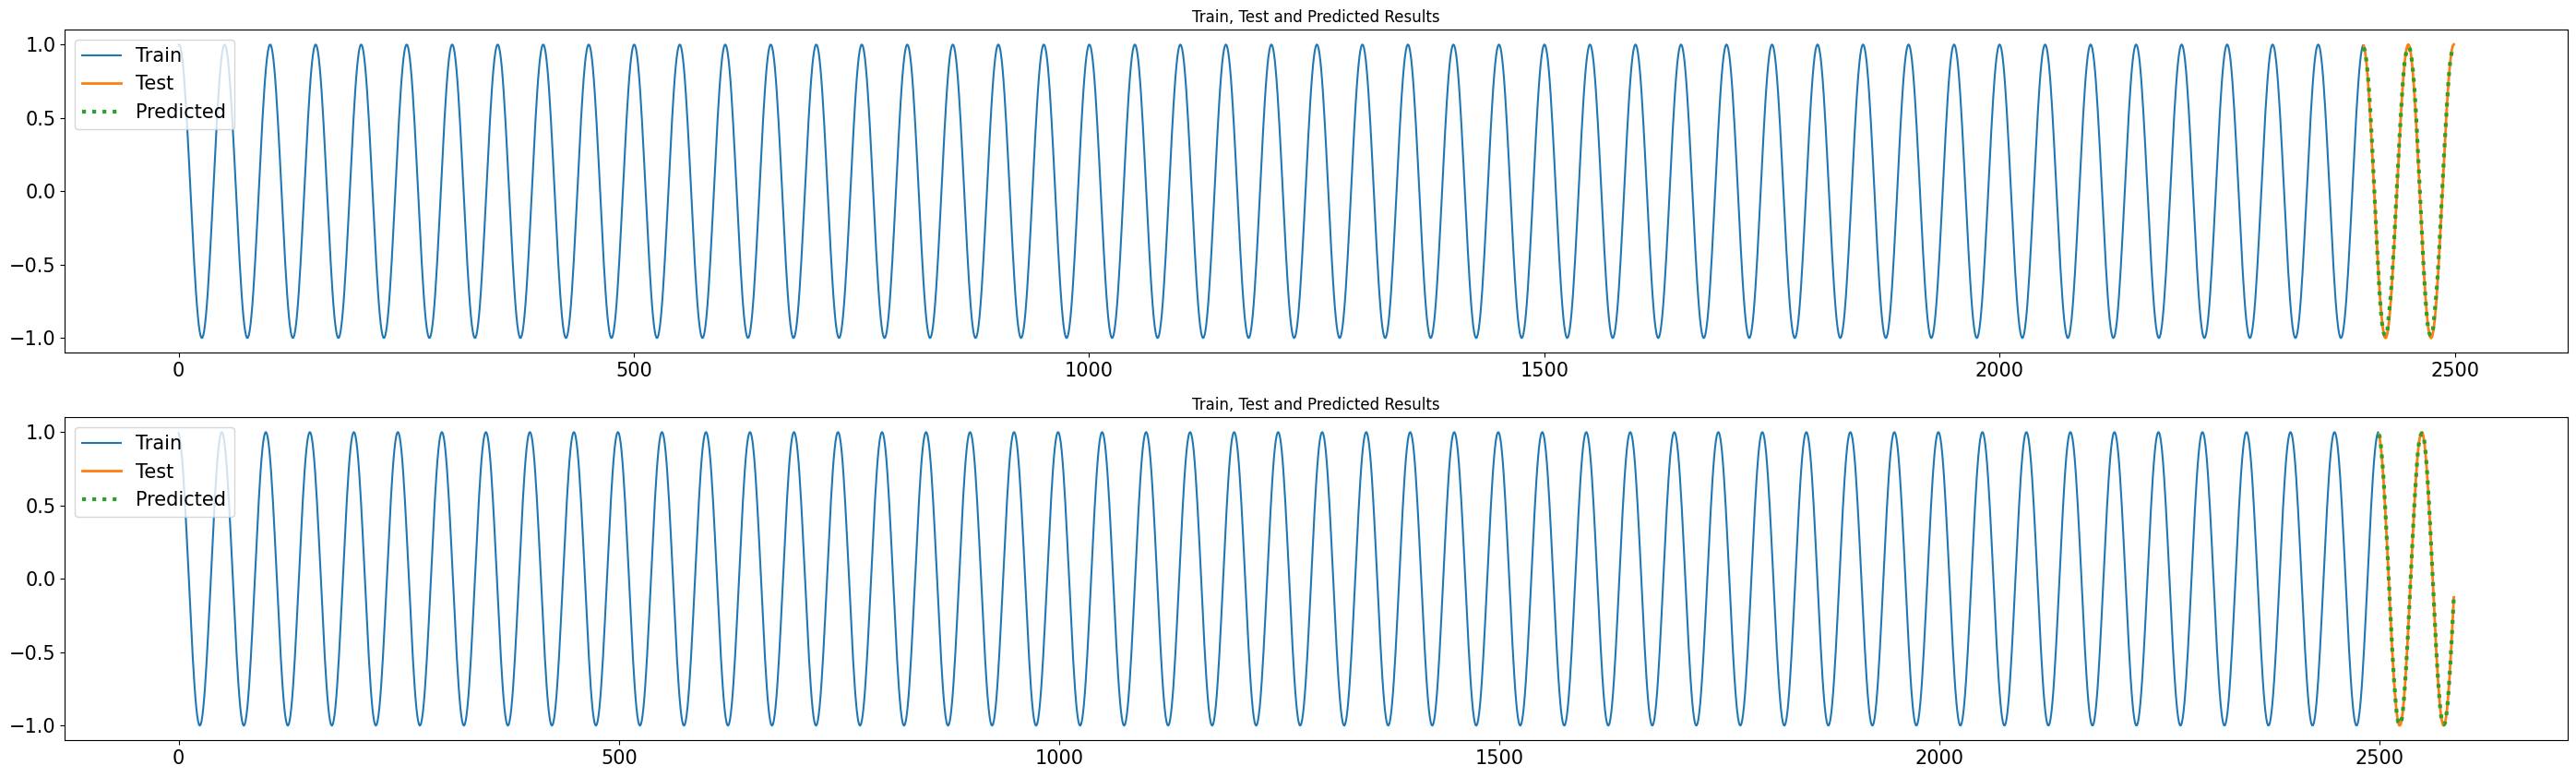

In [56]:
lstm_func(epochs, lag, X, y)

### FTLFN

1st split
4/4 [==============================] - 0s 667us/step
2nd split
3/3 [==============================] - 0s 1ms/step
The mse for the 1st split is: 0.0013423825347927368 vs 0.0011973182808749532 for the 2nd split


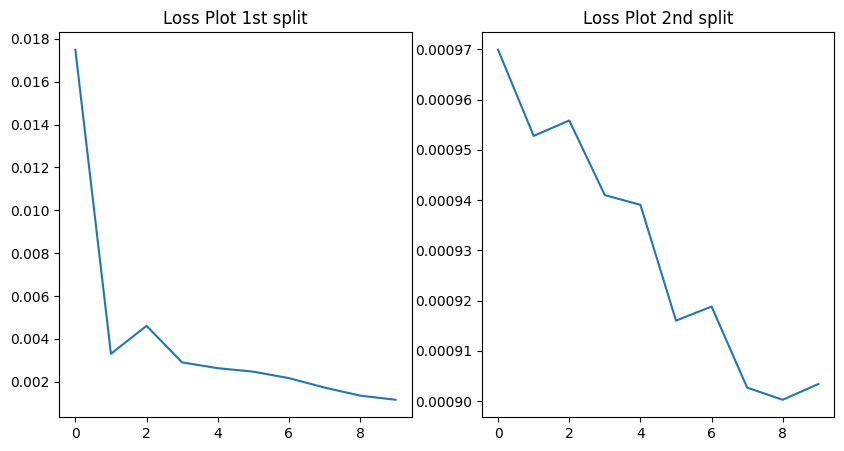

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


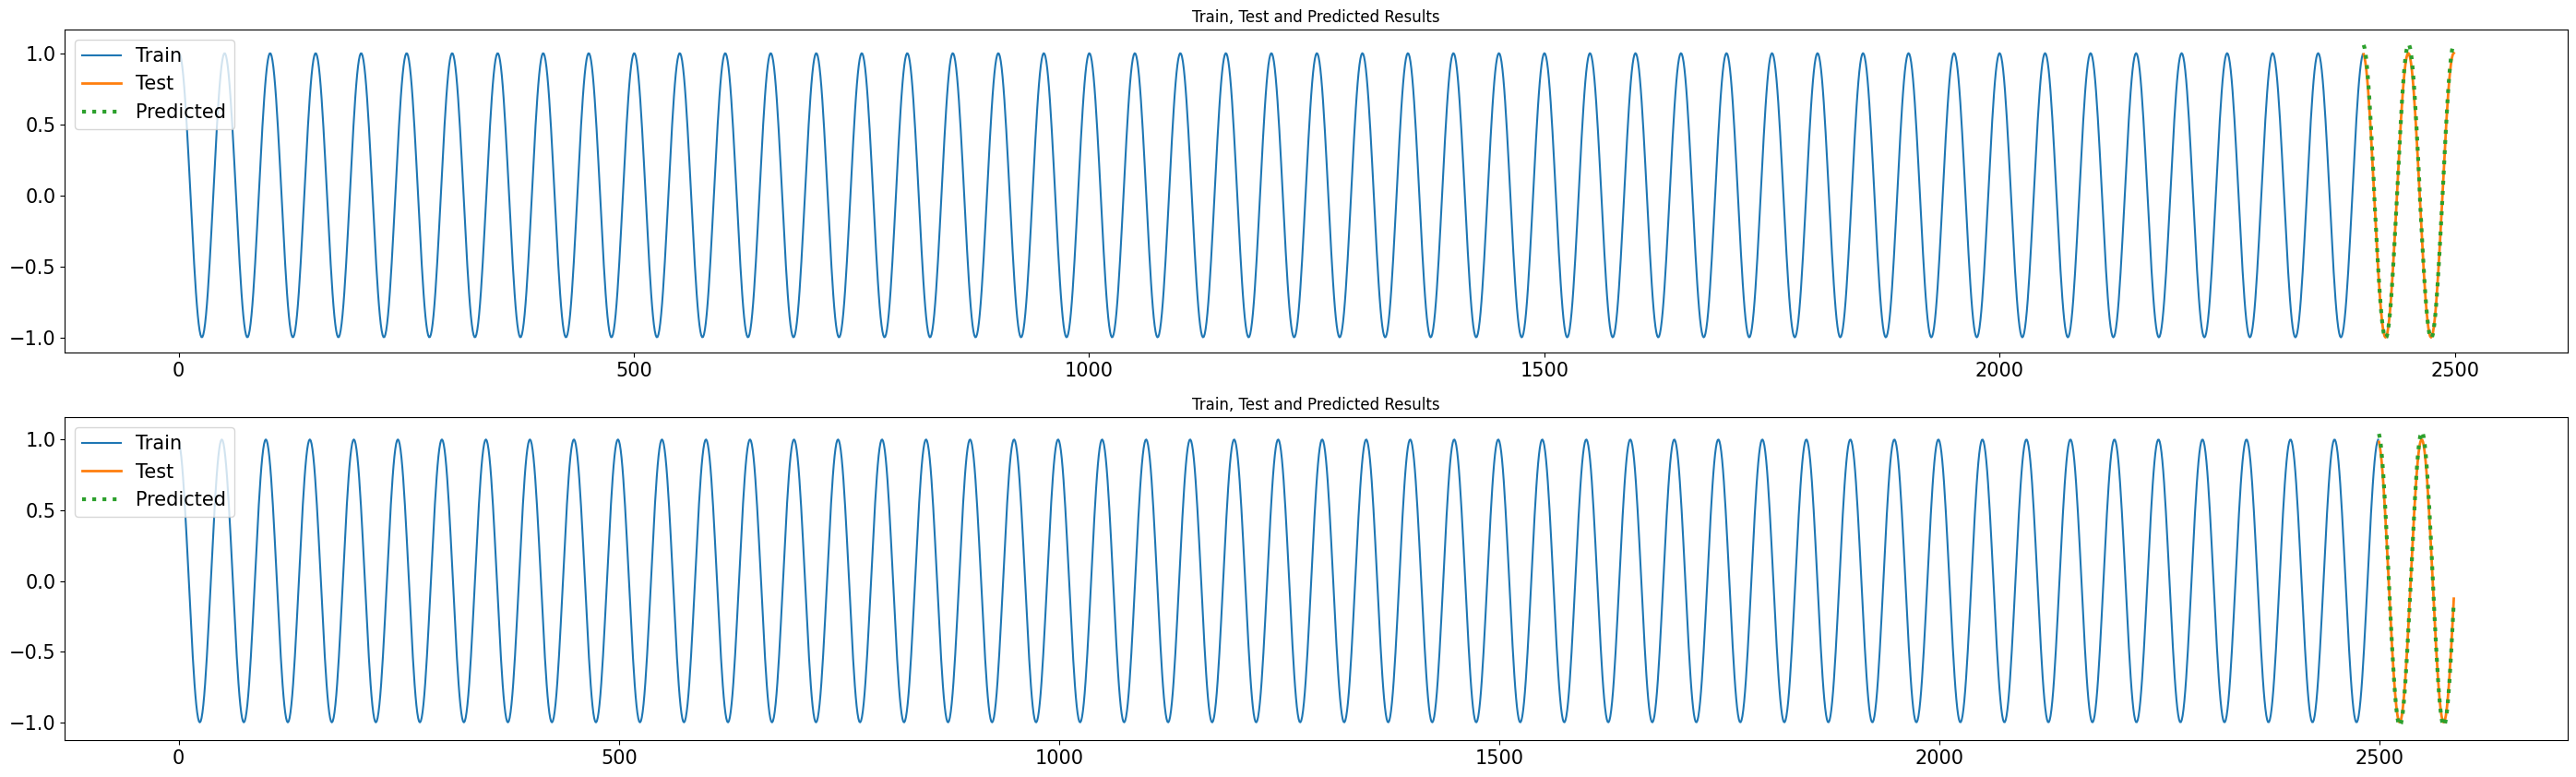

In [54]:
ftlfn_func(epochs, lag, X, y)

## ii) with noise by adding a Gaussian N(0, 0.05).

In [57]:
#add ao data o gaussian noise! (np.random(loc=0,scale (0.05, size = data[shape[0]])))
# I need to use the sin function
# First I need to generate the x
periods = 100
lag = 12
points_per_period = 50
data = np.sin(np.linspace(0,2*np.pi*periods, num=periods*points_per_period)) #This is my x, it will be my angles, 0 to pi.
                                                                         #it will creat equaly size spaces between 0 and .. (linspace)
                                                                            #and I apply the sin...
                                                                            # 
                                                                            # # lets add the lag"""
                                                                            
                                                                    
data = np.random.normal(loc=0, scale=0.05, size=data.shape[0])

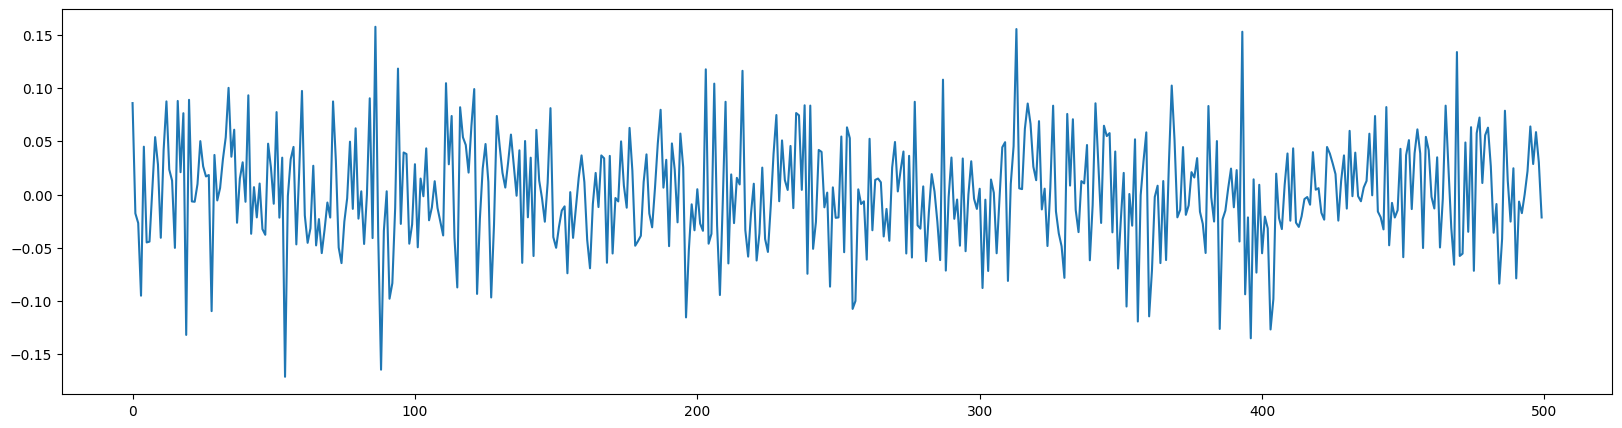

In [58]:
fig = plt.figure(figsize=(20,5))
plt.plot(data[0:500])
plt.show()

In [59]:
X, y = [], []
for i in range(lag, data.shape[0]-1):
    X.append(data[i-lag:i]) # we getting 12 sample. My x will have 4000 samples each with 12 instances
    y.append(data[i])

X = np.array(X)
y = np.array(y)

### LSTM

1st split
4/4 [==============================] - 0s 1ms/step
2nd split
3/3 [==============================] - 0s 1ms/step
The mse for the 1st split is: 0.0021306758738200236 vs 0.0028457493777524255 for the 2nd split


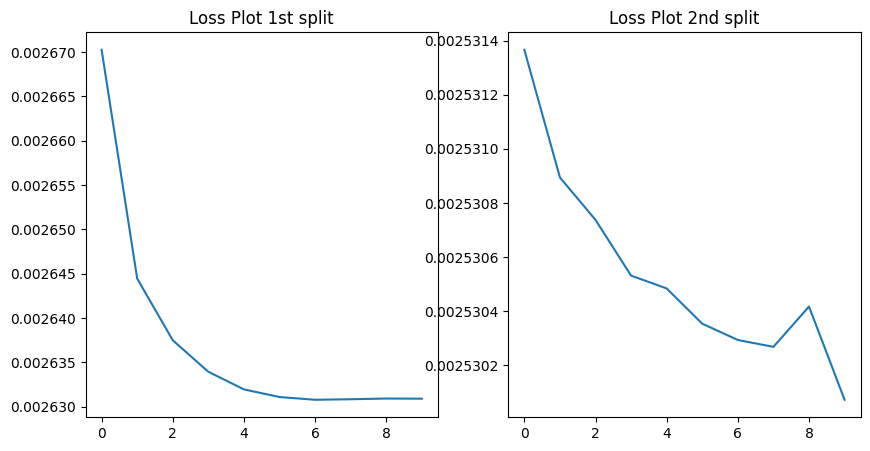

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


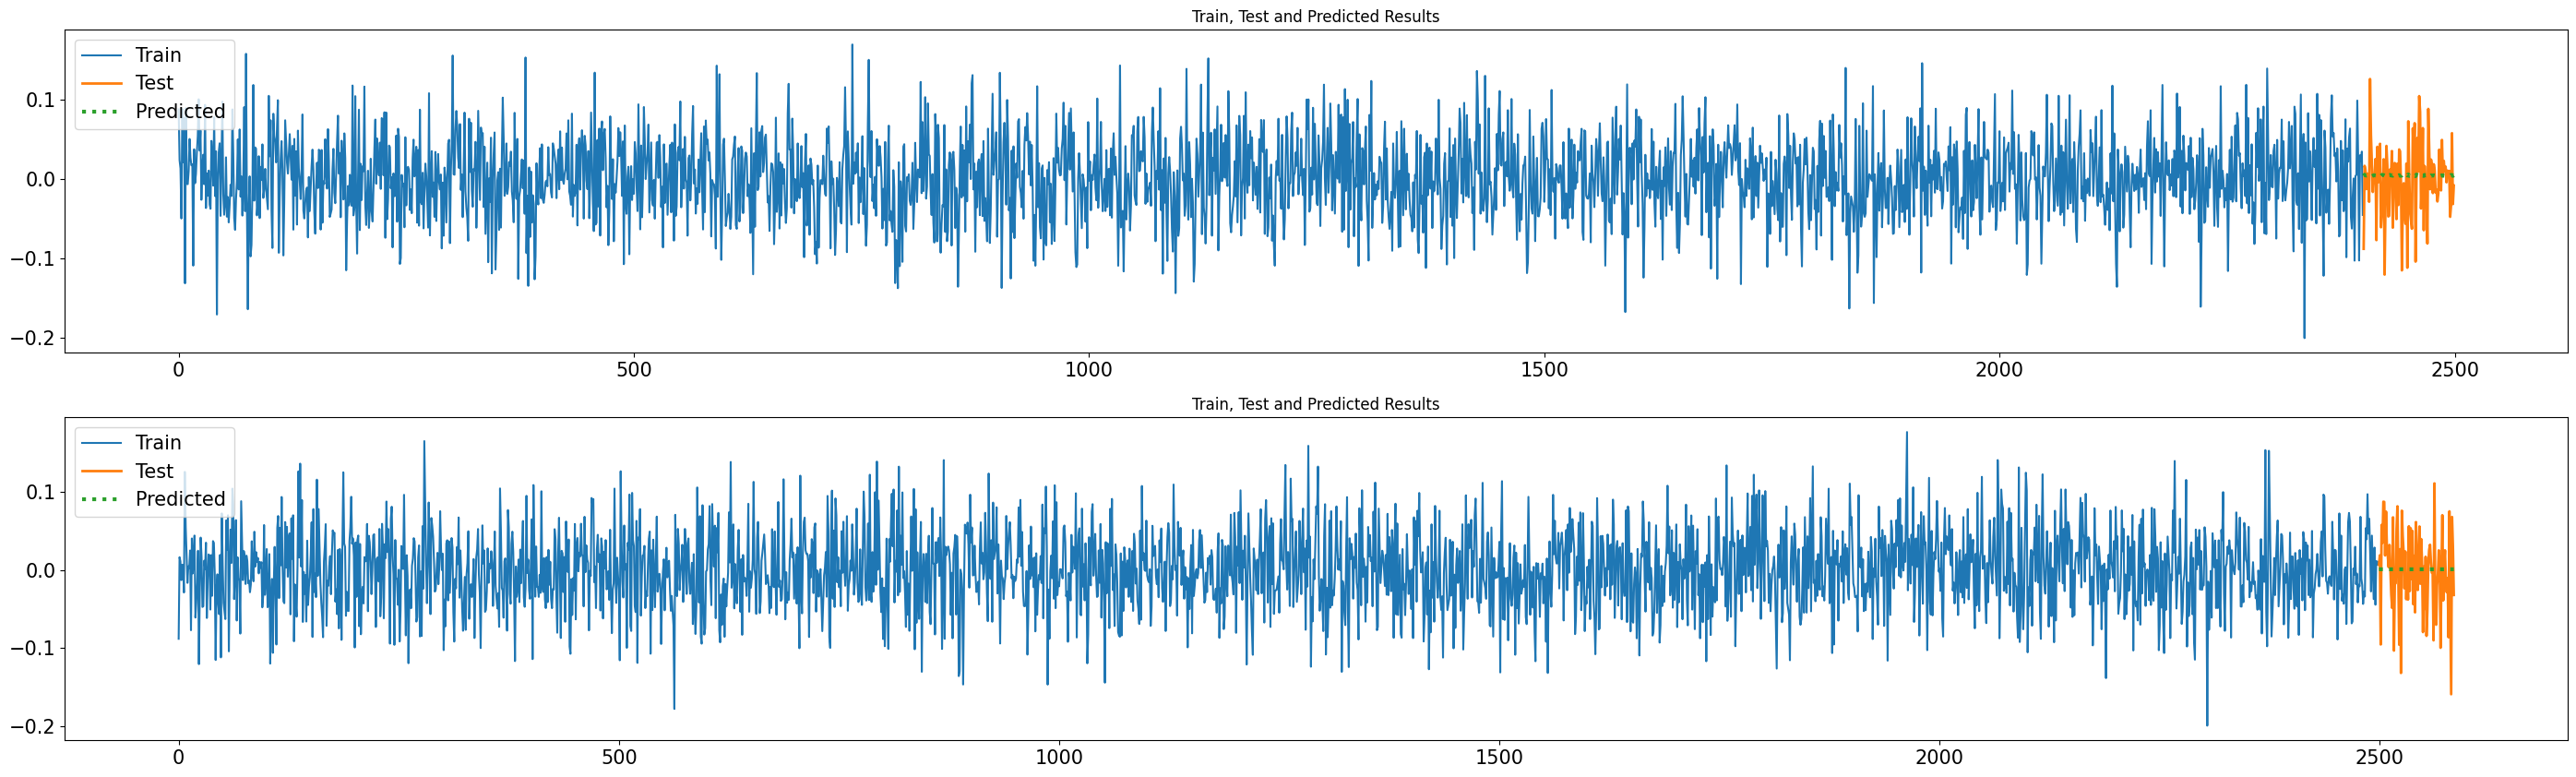

In [60]:
lstm_func(epochs, lag, X, y)

### FTLFN

1st split
4/4 [==============================] - 0s 667us/step
2nd split
3/3 [==============================] - 0s 1000us/step
The mse for the 1st split is: 0.0023484977919109615 vs 0.002740838081815712 for the 2nd split


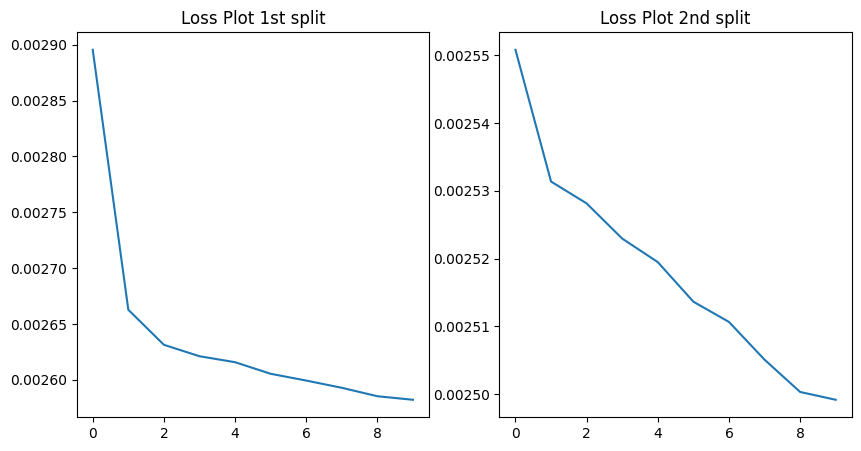

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


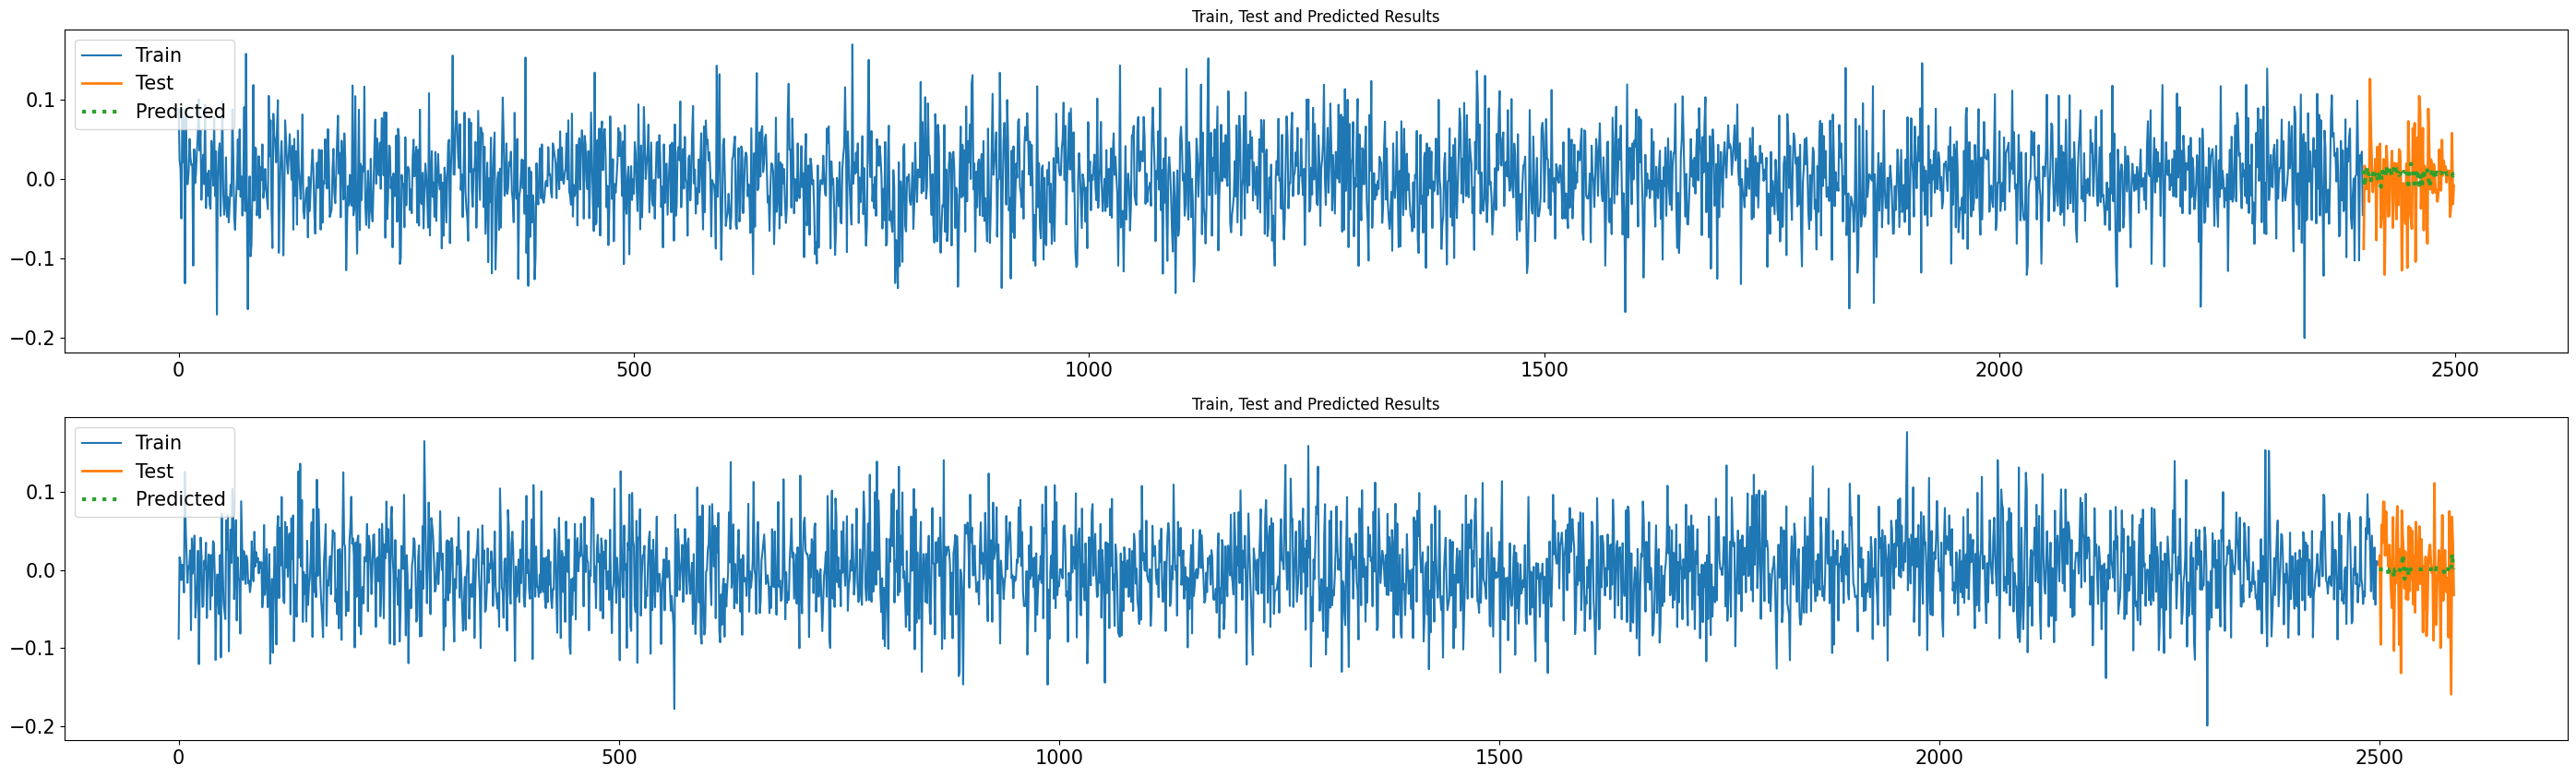

In [61]:
ftlfn_func(epochs, lag, X, y)

## Comments

bab


# Problem 2

In [62]:
nrEpochs = 50

alpha_one = 0.6
alpha_two = -0.54
alpha_three = -0.44
data = [5,6,3]
nr_datapoints = 5000
X, y = [], []

for i in range(nr_datapoints-3):
    data.append(alpha_one*data[i+2]
    + alpha_two*data[i+1]
    + alpha_three*data[i])

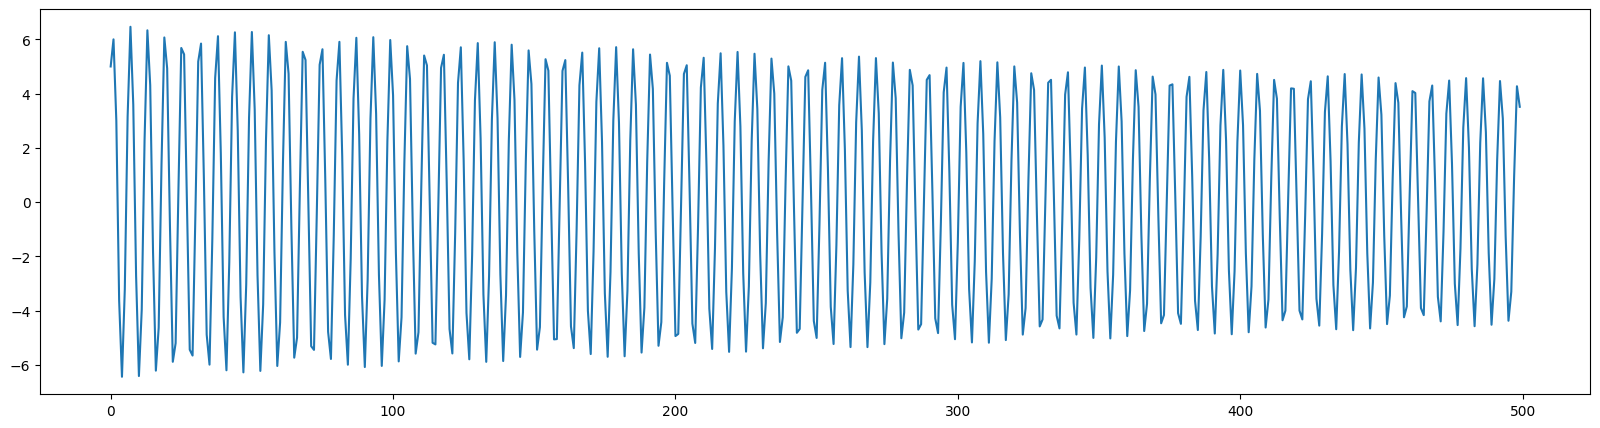

In [63]:
fig = plt.figure(figsize=(20,5))
plt.plot(data[0:500])
plt.show()

In [64]:
for i in range(lag, len(data)-1):
    X.append(data[i-lag:i]) # we getting 12 sample. My x will have 4000 samples each with 12 instances
    y.append(data[i])

y = np.array(y)
X = np.array(X)

## i) no noise, clean

### LSTM

1st split
4/4 [==============================] - 0s 1ms/step
2nd split
3/3 [==============================] - 0s 1ms/step
The mse for the 1st split is: 0.002642451820484284 vs 9.952321373521054e-06 for the 2nd split


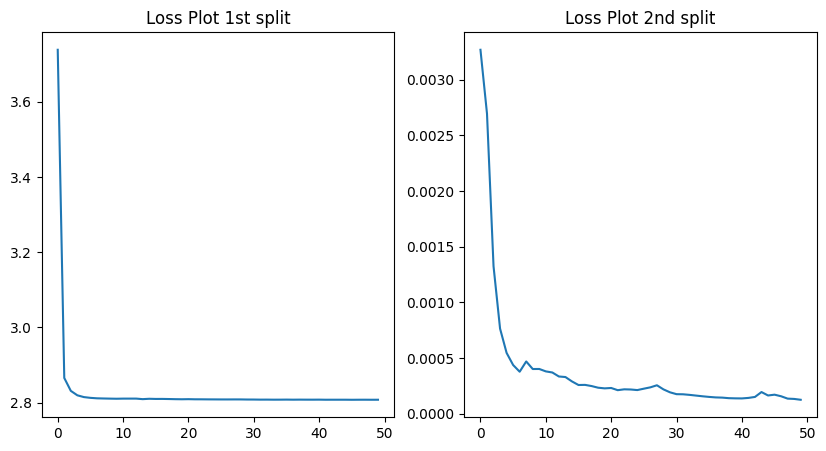

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


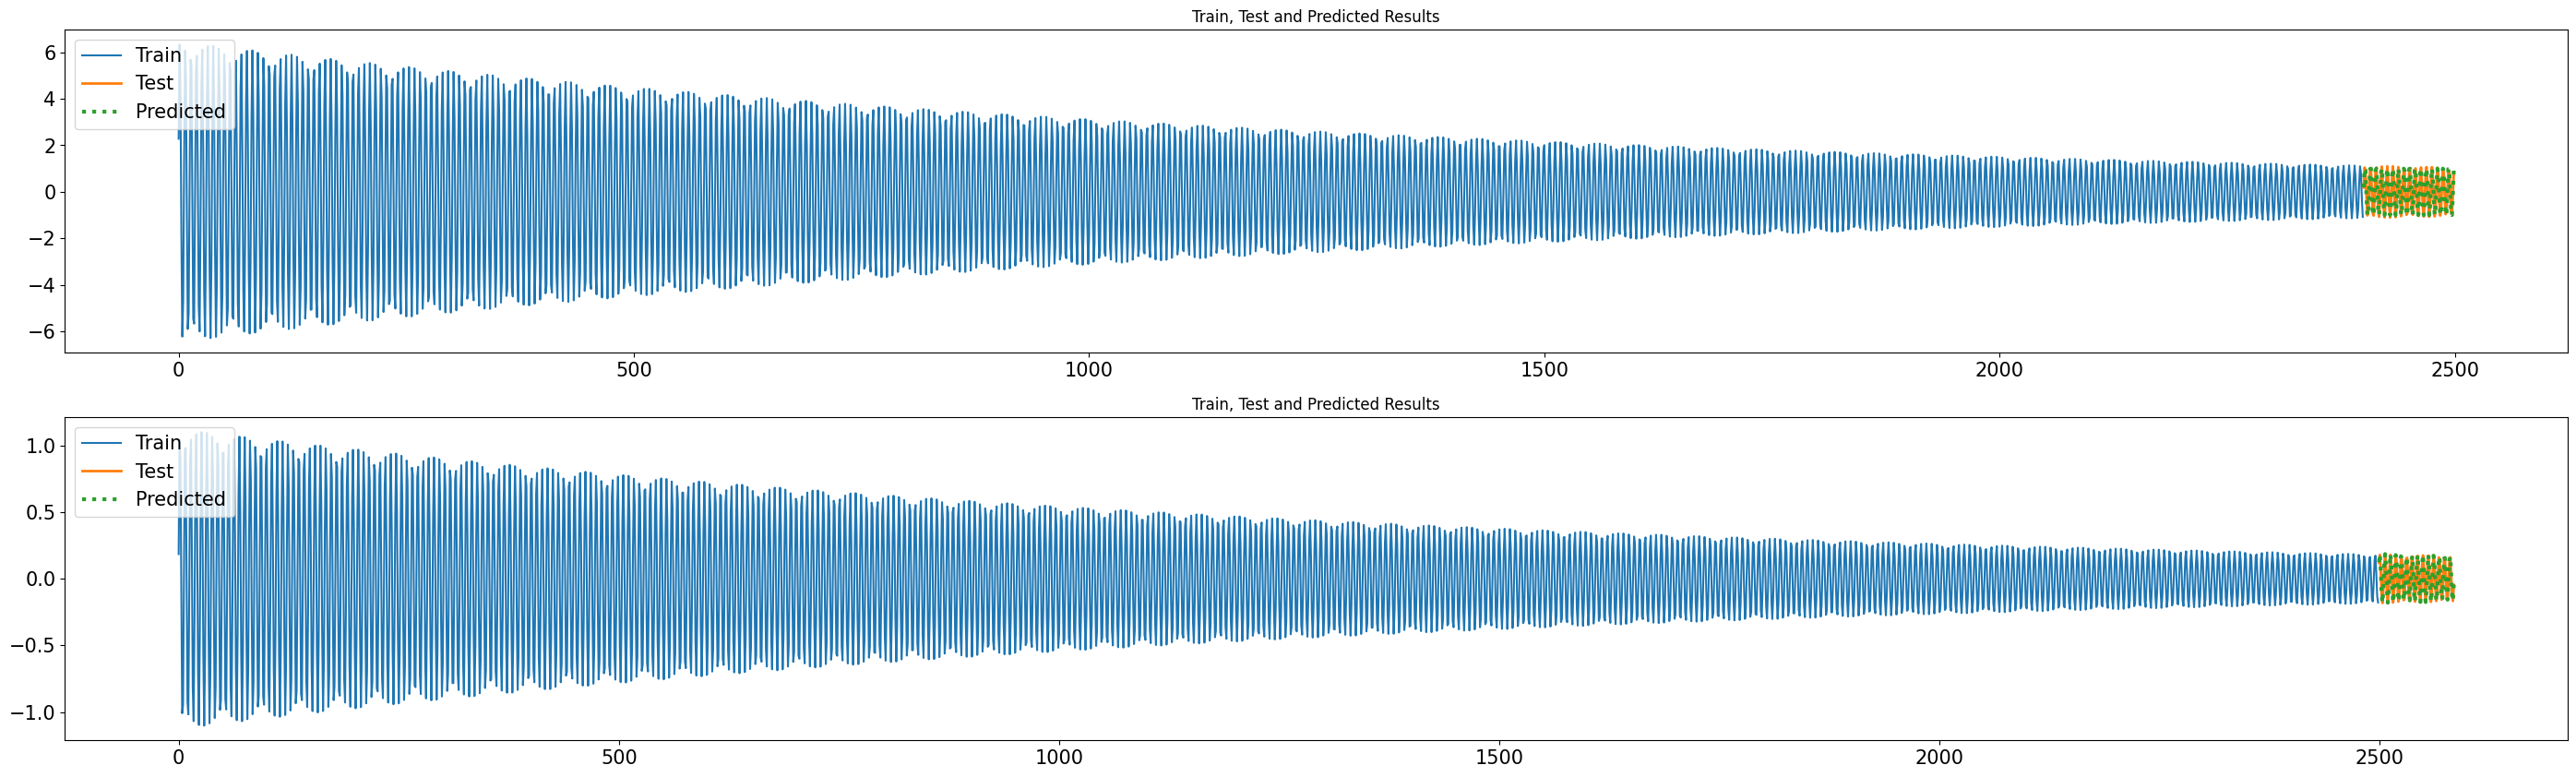

In [65]:
lstm_func(nrEpochs, lag, X, y)

### FTLFN

1st split
4/4 [==============================] - 0s 667us/step
2nd split
3/3 [==============================] - 0s 1000us/step
The mse for the 1st split is: 1.9225370561609625e-07 vs 2.0210350759248922e-14 for the 2nd split


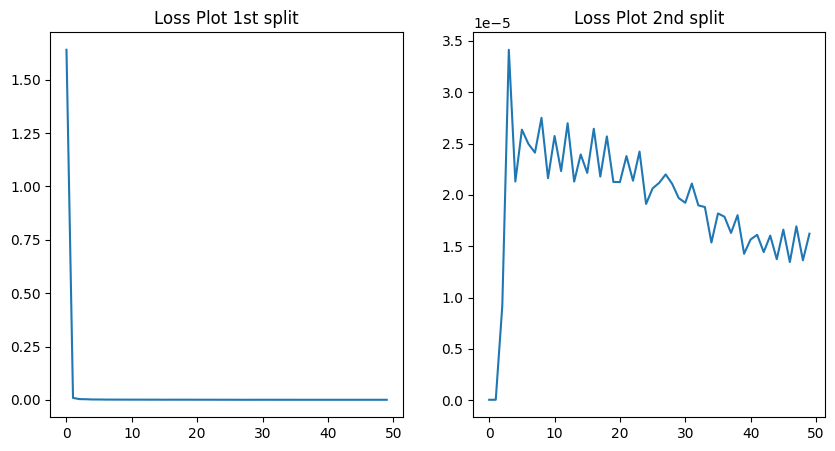

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


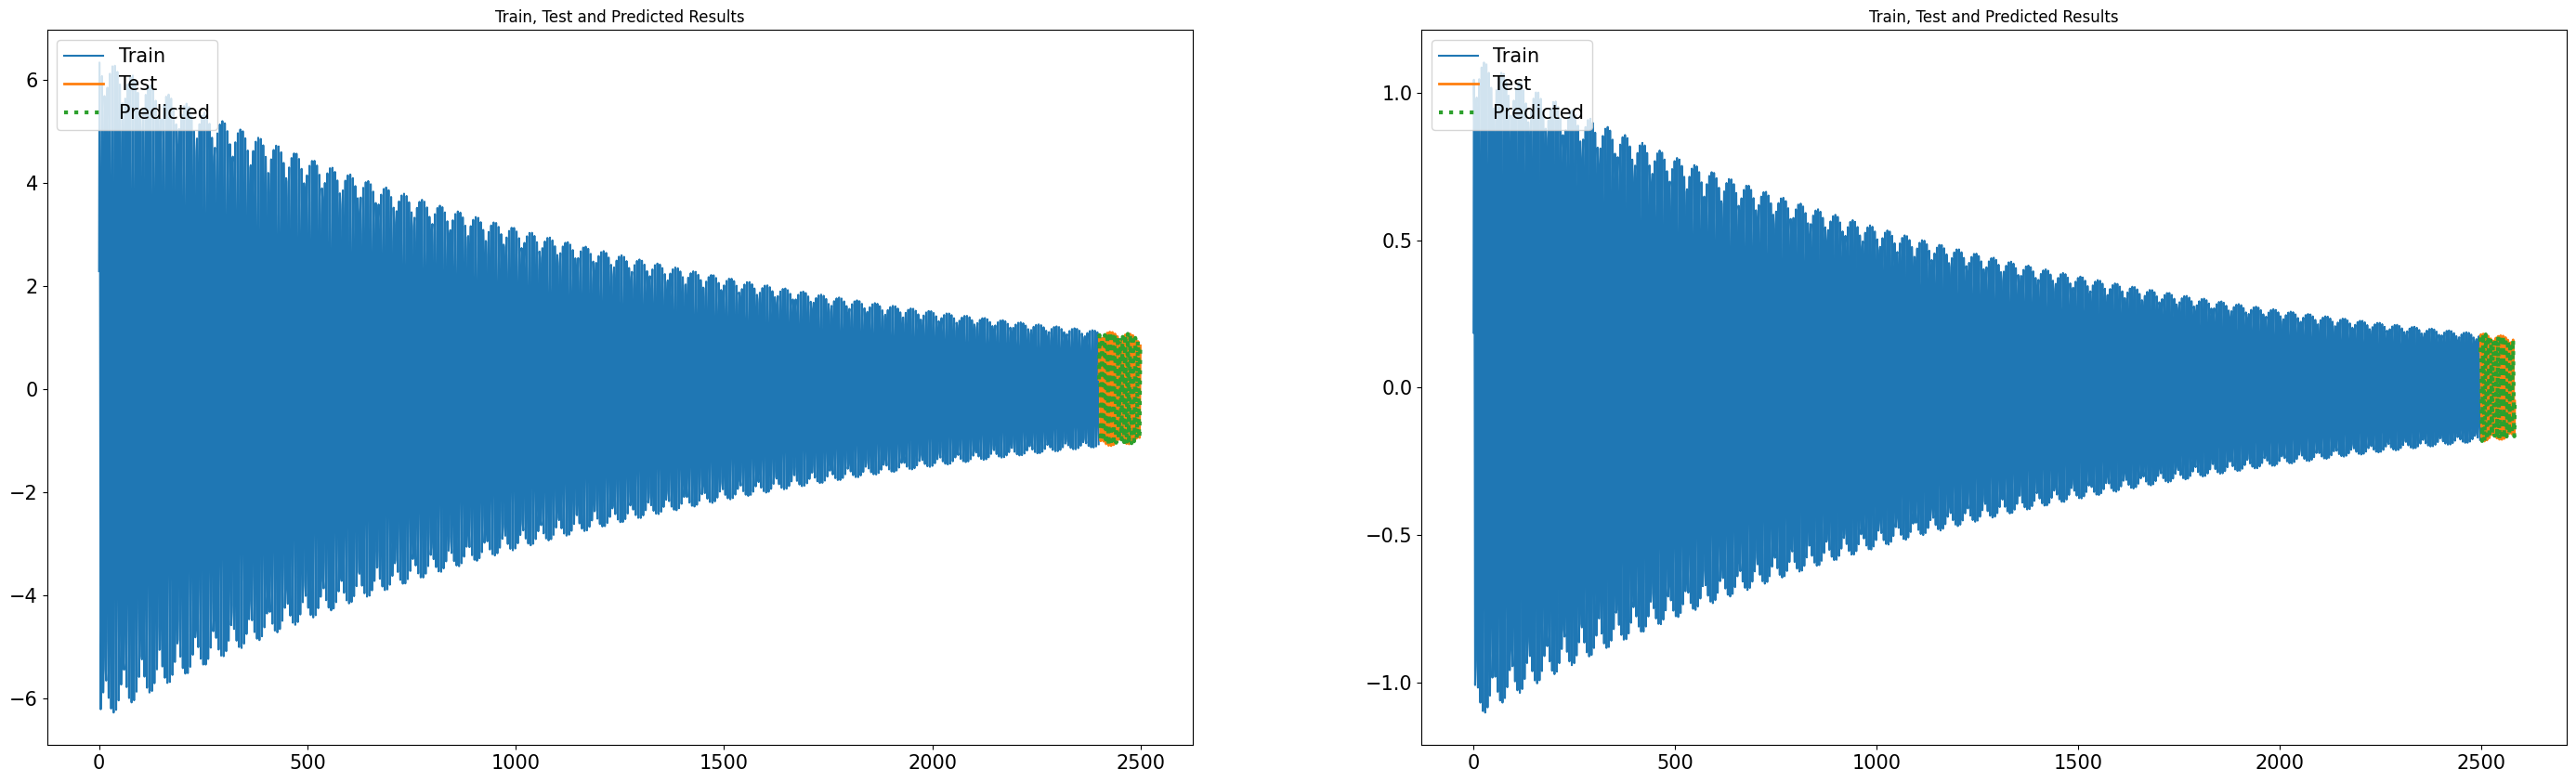

In [45]:
ftlfn_func(nrEpochs, lag, X, y)

## ii) with noise by adding a Gaussian noise N(0, 0.01)

In [ ]:
# lets add the lag
alpha_one = 0.6
alpha_two = -0.54
alpha_three = -0.44
data = [5,6,3]
nr_datapoints = 5000

X, y = [], []

for i in range(nr_datapoints-3):
    data.append(alpha_one*data[i+2]
    + alpha_two*data[i+1]
    + alpha_three*data[i] + 0.01)

In [ ]:
fig = plt.figure(figsize=(20,5))
plt.plot(data[0:500])
plt.show()

In [ ]:
for i in range(lag, len(data)-1):
    X.append(data[i-lag:i]) # we getting 12 sample. My x will have 4000 samples each with 12 instances
    y.append(data[i])

y = np.array(y)

### LSTM

In [ ]:
lstm_func(nrEpochs, lag, X, y)

### FTLFN

In [ ]:
ftlfn_func(nrEpochs, lag, X, y)

## Comments

baba


